In [21]:
import pytesseract
from matplotlib.image import imread
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import cv2
import random

In [22]:
df = "../image/Train"

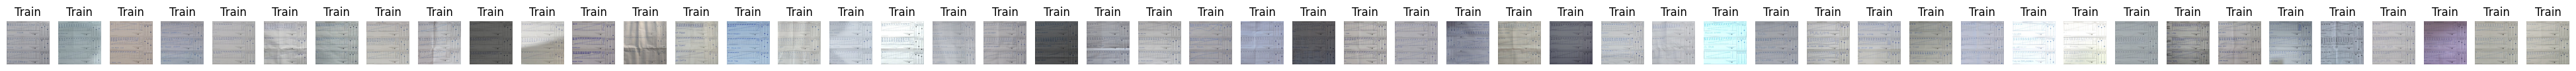

In [23]:
# Get list of all image files
filepaths = []
for root, _, files in os.walk(df):
    for file in files:
        if file.endswith('.jpg'):
            filepaths.append(os.path.join(root, file))

# Choose random images from the dataset
num_samples = 50  # Number of sample images to display
sample_images = random.sample(filepaths, num_samples)

# Display sample images
plt.figure(figsize=(50, 15))
for i, image_path in enumerate(sample_images, 1):
    plt.subplot(1, num_samples, i)
    image = mpimg.imread(image_path)
    plt.imshow(image)
    plt.title(os.path.basename(os.path.dirname(image_path)))  # Display folder name as title
    plt.axis('off')
plt.show()

Mengubah Ukuran foto

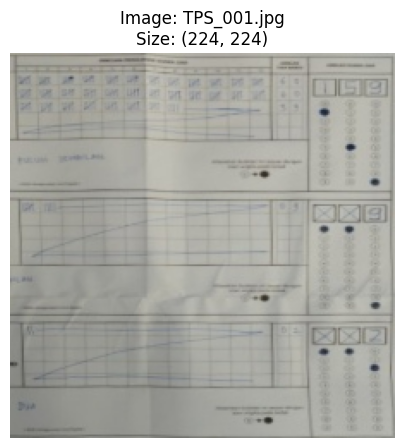

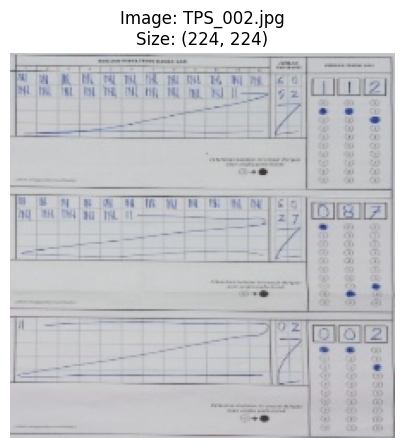

In [24]:
# Target size for resizing
target_size = (224, 224)  # Contoh ukuran yang diinginkan, sesuaikan dengan kebutuhan Anda

# Counter for limiting the number of images displayed
displayed_images = 0

# Loop through all image files in the directory
for filename in os.listdir(df):
    if filename.endswith(".jpg"):
        # Load the image
        image_path = os.path.join(df, filename)
        image = cv2.imread(image_path)
        
        # Resize the image
        resized_image = cv2.resize(image, target_size)
        
        # Show the image and its size
        plt.figure(figsize=(5, 5))
        plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
        plt.title(f"Image: {filename}\nSize: {target_size}")
        plt.axis('off')
        plt.show()
        
        # Increment the counter
        displayed_images += 1
        
        # Check if we have displayed 5 images, if yes, break the loop
        if displayed_images == 2:
            break

Cara mengecek flipping dan mirroring

In [25]:
# Function to check for flipping or mirroring
def check_flipping_or_mirroring(image_paths, image_directory, num_images=500):
    n_images = min(num_images, len(image_paths))
    
    for i in range(n_images):
        image1_path = os.path.join(image_directory, image_paths[i])
        image1 = cv2.imread(image1_path)
        
        for j in range(i+1, n_images):
            image2_path = os.path.join(image_directory, image_paths[j])
            image2 = cv2.imread(image2_path)
            
            # Check if images are the same size
            if image1.shape != image2.shape:
                print(f"Images {image1_path} and {image2_path} have different dimensions and cannot be compared.")
                continue
            
            # Check for horizontal flipping
            flipped_horizontal = cv2.flip(image1, 1)
            if (flipped_horizontal == image2).all():
                print(f"Flipping detected between {image1_path} and {image2_path} (horizontal flipping).")
            
            # Check for vertical flipping
            flipped_vertical = cv2.flip(image1, 0)
            if (flipped_vertical == image2).all():
                print(f"Flipping detected between {image1_path} and {image2_path} (vertical flipping).")
            
            # Check for mirroring
            if (flipped_horizontal == image2).all() or (flipped_vertical == image2).all():
                print(f"Mirroring detected between {image1_path} and {image2_path}.")

# Suppose 'df' is a DataFrame containing a column 'image_name' with names of image files
df = pd.DataFrame({'Train': ["TPS_207.jpg", "TPS_204.jpg", "TPS_217.jpg"]})

# Define the directory path containing the images
image_directory = "../image/Train"

# Call the function to check for flipping or mirroring
check_flipping_or_mirroring(df['Train'], image_directory)
